# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\srsch\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
# based on unexpected warning thrown from example data, I am adding in code to check if the type casting worked

print(clean_hospital_read_df.dtypes)

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges            int32
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object


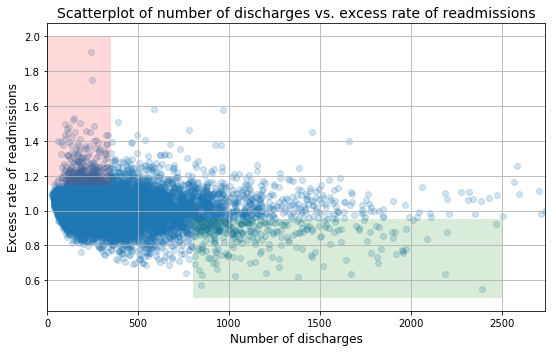

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### Exercise

Include your work on the following in this notebook and submit to your Github account.

A. Do you agree with the above analysis and recommendations? Why or why not?

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for  αα  = .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above.
    * What are the advantages and disadvantages of using this plot to convey information?
    * Construct another plot that conveys the same information in a more direct manner.

You can compose in notebook cells using Markdown:
* In the control panel at the top, choose Cell > Cell Type > Markdown
* Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

## My Assessment: Assertion of Relationship is Unfounded and Unlikely

Inspecting the scatter plot does not support the conclusions offered in the initial analysis. Based on my review of the plot, I would expect that, while there may be a correlation between number of discharges and readmission ratio, it is likely a flat relationship. The observation of a downward trend appears to be driven by the conical shape of the plot, a shape which is steeper from the top left to the right than from the bottom left to the right. Considering the concentration of points and its location in the figure any correlation appears to be flat, or slightly upward. Additional analysis, specifically a regression line, is needed to test the effect size that discharges has on excess readmission.

## Re-analytic Process

1. Check number of observations; this checks if we can apply the CLT to assert normality.
2. Obtain correlation coefficient and its p-value to test the presence of a correlation.
3. If a correlation is present, fit a regression model to obtain an effect size.
4. If regression documents a relationship, replot figure, including a best fit line.

### Observation Count

In [6]:
# view the organized data
clean_hospital_read_df.head()

Hospital Name  Provider Number State  \
16857           THREE RIVERS MEDICAL CENTER           180128    KY   
14582  SELLS INDIAN HEALTH SERVICE HOSPITAL            30074    AZ   
15606     PHS INDIAN HOSPITAL AT PINE RIDGE           430081    SD   
15615    FLORIDA STATE HOSPITAL UNIT 31 MED           100298    FL   
14551                GREENE COUNTY HOSPITAL            10051    AL   

                 Measure Name  Number of Discharges  Footnote  \
16857  READM-30-HIP-KNEE-HRRP                     0       7.0   
14582      READM-30-COPD-HRRP                     0       7.0   
15606       READM-30-AMI-HRRP                     0       7.0   
15615      READM-30-COPD-HRRP                     0       7.0   
14551       READM-30-AMI-HRRP                     0       7.0   

       Excess Readmission Ratio  Predicted Readmission Rate  \
16857                       NaN                         NaN   
14582                       NaN                         NaN   
15606                       NaN                         NaN   
15615                       NaN                         NaN   
14551                       NaN                         NaN   

       Expected Readmission Rate  Number of Readmissions  Start Date  \
16857                        NaN                     NaN  07/01/2010   
14582                        NaN                     NaN  07/01/2010   
15606                        NaN                     NaN  07/01/2010   
15615                        NaN                     NaN  07/01/2010   
14551                        NaN                     NaN  07/01/2010   

         End Date  
16857  06/30/2013  
14582  06/30/2013  
15606  06/30/2013  
15615  06/30/2013  
14551  06/30/2013

In [7]:
# cut NaN rows
readmit_data = clean_hospital_read_df.dropna(thresh = 9)
readmit_data.tail(10)

Hospital Name  Provider Number State  \
8818   CHRISTIANA CARE HEALTH SERVICES, INC.            80001    DE   
572           SOUTHCOAST HOSPITAL GROUP, INC           220074    MA   
136             BEAUMONT HOSPITAL, ROYAL OAK           230130    MI   
1698                        FLORIDA HOSPITAL           100007    FL   
1242                        FLORIDA HOSPITAL           100007    FL   
8126               NAPLES COMMUNITY HOSPITAL           100018    FL   
6643                COMMUNITY MEDICAL CENTER           310041    NJ   
1892                        FLORIDA HOSPITAL           100007    FL   
13615           NEW ENGLAND BAPTIST HOSPITAL           220088    MA   
13666           HOSPITAL FOR SPECIAL SURGERY           330270    NY   

                 Measure Name  Number of Discharges  Footnote  \
8818         READM-30-HF-HRRP                  2509       NaN   
572        READM-30-COPD-HRRP                  2565       NaN   
136    READM-30-HIP-KNEE-HRRP                  2581       NaN   
1698   READM-30-HIP-KNEE-HRRP                  2596       NaN   
1242       READM-30-COPD-HRRP                  2705       NaN   
8126   READM-30-HIP-KNEE-HRRP                  2716       NaN   
6643       READM-30-COPD-HRRP                  2740       NaN   
1892         READM-30-HF-HRRP                  3570       NaN   
13615  READM-30-HIP-KNEE-HRRP                  3980       NaN   
13666  READM-30-HIP-KNEE-HRRP                  6793       NaN   

       Excess Readmission Ratio  Predicted Readmission Rate  \
8818                     0.9712                        21.8   
572                      1.1637                        23.7   
136                      1.2577                         7.5   
1698                     1.0962                         5.6   
1242                     1.1148                        22.0   
8126                     0.9804                         5.2   
6643                     1.0003                        22.7   
1892                     1.0896                        24.5   
13615                    0.7682                         3.7   
13666                    0.7379                         3.9   

       Expected Readmission Rate  Number of Readmissions  Start Date  \
8818                        22.5                   546.0  07/01/2010   
572                         20.4                   619.0  07/01/2010   
136                          5.9                   197.0  07/01/2010   
1698                         5.1                   147.0  07/01/2010   
1242                        19.7                   603.0  07/01/2010   
8126                         5.3                   141.0  07/01/2010   
6643                        22.7                   623.0  07/01/2010   
1892                        22.5                   879.0  07/01/2010   
13615                        4.8                   142.0  07/01/2010   
13666                        5.3                   258.0  07/01/2010   

         End Date  
8818   06/30/2013  
572    06/30/2013  
136    06/30/2013  
1698   06/30/2013  
1242   06/30/2013  
8126   06/30/2013  
6643   06/30/2013  
1892   06/30/2013  
13615  06/30/2013  
13666  06/30/2013

In [8]:
print("There are", readmit_data.shape[0] + 1, "observations.")

There are 11498 observations.


With almost 11,500 observations, there is enough data to assert normality for number of discharges and excess readmissions, according to the central limit theorem.

### Correlation Test

In [9]:
# test correlation

import scipy.stats as stats
rho, p = stats.pearsonr(readmit_data["Number of Discharges"], readmit_data["Excess Readmission Ratio"])

print( "The correlation coefficient is %.3f and its p-value is %.3f." % (rho, p))

The correlation coefficient is -0.097 and its p-value is 0.000.


Though the correlation is confirmed and it is negative, both of which supports the original conclusions, the coefficient is very close to zero (0). Such a small correlation suggests that number of discharges is not a good predictor of excess readmissions.

### Regression Analysis

A simple regression will be sufficient to test if there is any ability to make a causal interpretation. However, the scatter plot shows clear heteroskedasticity. This regression must robust standard errors.

In [16]:
# load the statsmodels package to get access to robust standard errors
from statsmodels.formula.api import ols

# estimate the model
#x = readmit_data["Number of Discharges"]
#x = sm.add_constant(x)
mod = ols('readmit_data["Excess Readmission Ratio"] ~ readmit_data["Number of Discharges"]', readmit_data).fit(cov_type = "HC1")
mod.summary()

C:\Users\srsch\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     readmit_data["Excess Readmission Ratio"]   R-squared:                       0.009
Model:                                                  OLS   Adj. R-squared:                  0.009
Method:                                       Least Squares   F-statistic:                     72.48
Date:                                      Fri, 15 Sep 2017   Prob (F-statistic):           1.89e-17
Time:                                              13:41:00   Log-Likelihood:                 11178.
No. Observations:                                     11497   AIC:                        -2.235e+04
Df Residuals:                                         11495   BIC:                        -2.234e+04
Df Model:                                                 1                                         
Covariance Type:                                        HC1                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.0181      0.001    755.438      0.000       1.015       1.021
readmit_data["Number of Discharges"] -2.901e-05   3.41e-06     -8.514      0.000   -3.57e-05   -2.23e-05
==============================================================================
Omnibus:                     1666.940   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6839.197
Skew:                           0.671   Prob(JB):                         0.00
Kurtosis:                       6.532   Cond. No.                         741.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

The regression results confirm the story that had been emerging so far. Yes, there is a statistically significant relationship between between discharges and excess readmissions and, yes, that is a negative relationship, with larger facilities having fewer excess readmissions. However, the effect size is miniscule; decreasing the number of predicted discharges by 1 over three years requires approximately an additional 1,800 discharges per year, or an additional 6,400 discharges over three years. I would not recommend that my client put a great deal of attention in seeking small institutions to behave more like larger institutions. This data does not indicate what steps should be taken to reduce excess readmission.

### Rebuild figure using fit line and log-linear relationship

The shape of the plot supported the misleading conclusions. The addition of a best-fit line to the figure will show just how flat the relationship is and help to make it clearer that, while there is enough data to show a statistically significant relationship, there is no substantively significant relationship between discharge numbers and excess readmission.

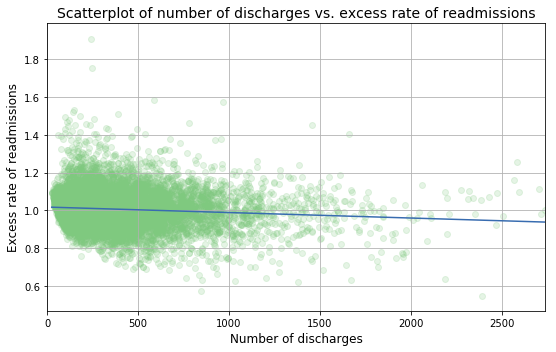

In [17]:
# store fit results in clearer labels
intercept = mod.params[0]
slope = mod.params[1]

# colors borrowed from Allen Downey's presentations
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

# regenerate improved scatter plot

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in readmit_data['Number of Discharges'][:-3]]
y = list(readmit_data['Excess Readmission Ratio'][:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2, c = COLOR1)

points = np.linspace(readmit_data['Number of Discharges'][:-3].min(), readmit_data['Number of Discharges'][:-3].max(), 2)
plt.plot(points, slope*points + intercept, c = COLOR5)

"""These boxes are not appropriate with the new results, even as they give greater aesthetic appeal to the figure
ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)"""

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()